In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab/financial_sentiment_data.csv')
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
data.shape

(5842, 2)

In [ ]:
data.dtypes

,0
Sentence,object
Sentiment,object


In [ ]:
data.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Net sales decreased to EUR 220.5 mn from EUR 4...,neutral
freq,2,3130


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
data.isnull().sum()

,0
Sentence,0
Sentiment,0


In [ ]:
data.duplicated().sum()

np.int64(6)

In [ ]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

                                               Sentence Sentiment
1825  Proha Plc ( Euronext :7327 ) announced today (...   neutral
1859  SSH Communications Security Corporation is hea...   neutral
2672  Ahlstrom 's share is quoted on the NASDAQ OMX ...   neutral
3272  The company serves customers in various indust...   neutral
3986  The issuer is solely responsible for the conte...   neutral
5342  The report profiles 614 companies including ma...   neutral


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data['Sentiment'].value_counts()

,count
Sentiment,
neutral,3124
positive,1852
negative,860


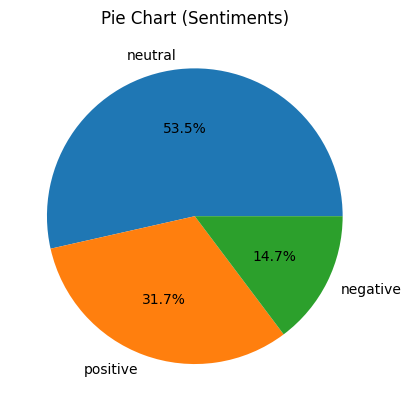

In [ ]:
plt.pie(data['Sentiment'].value_counts(), labels=data['Sentiment'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart (Sentiments)')
plt.show()

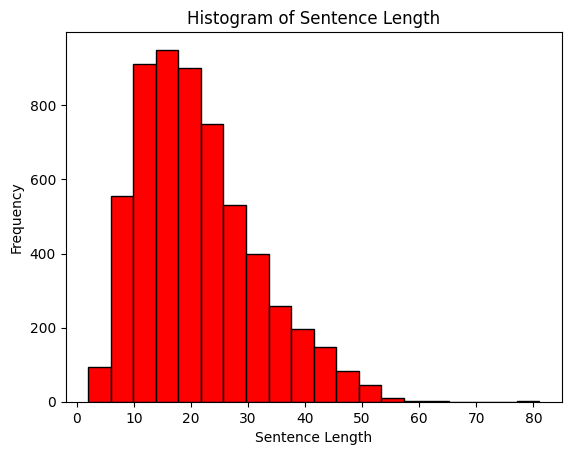

In [ ]:
data['Sentence_Length'] = data['Sentence'].apply(lambda x: len(x.split()))
plt.hist(data['Sentence_Length'], bins=20, color='red', edgecolor='black')
plt.title('Histogram of Sentence Length')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

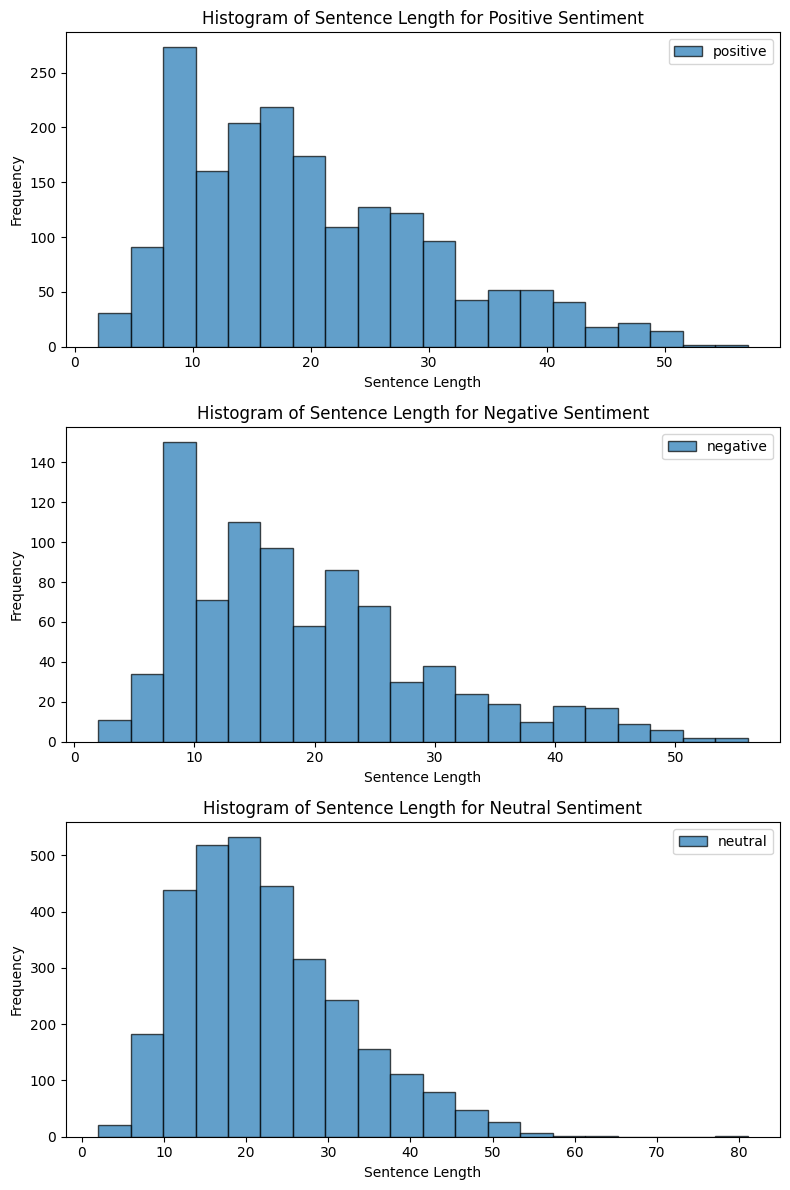

In [ ]:
sentiments = ['positive', 'negative', 'neutral']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

for i, sentiment in enumerate(sentiments):
  subset_data = data[data['Sentiment'] == sentiment]
  subset_data['Sentence_Length'] = subset_data['Sentence'].apply(lambda x: len(x.split()))

  axes[i].hist(subset_data['Sentence_Length'], bins=20, edgecolor='black', alpha=0.7, label=sentiment)

  axes[i].set_title(f"Histogram of Sentence Length for {sentiment.capitalize()} Sentiment")
  axes[i].set_xlabel('Sentence Length')
  axes[i].set_ylabel('Frequency')
  axes[i].legend()

plt.tight_layout()
plt.show()

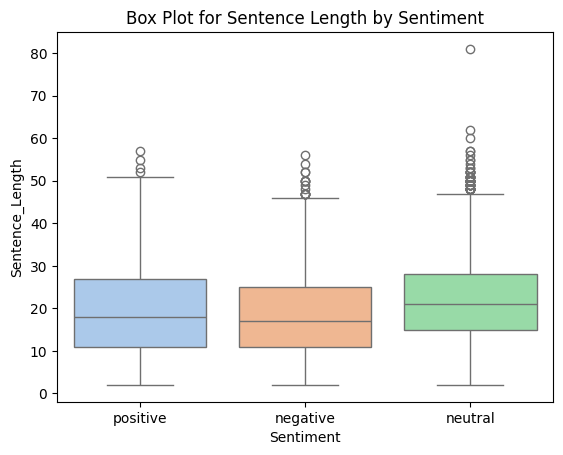

In [ ]:
sns.boxplot(x ="Sentiment" , y="Sentence_Length", data = data , palette ="pastel")
plt.title("Box Plot for Sentence Length by Sentiment")
plt.show()

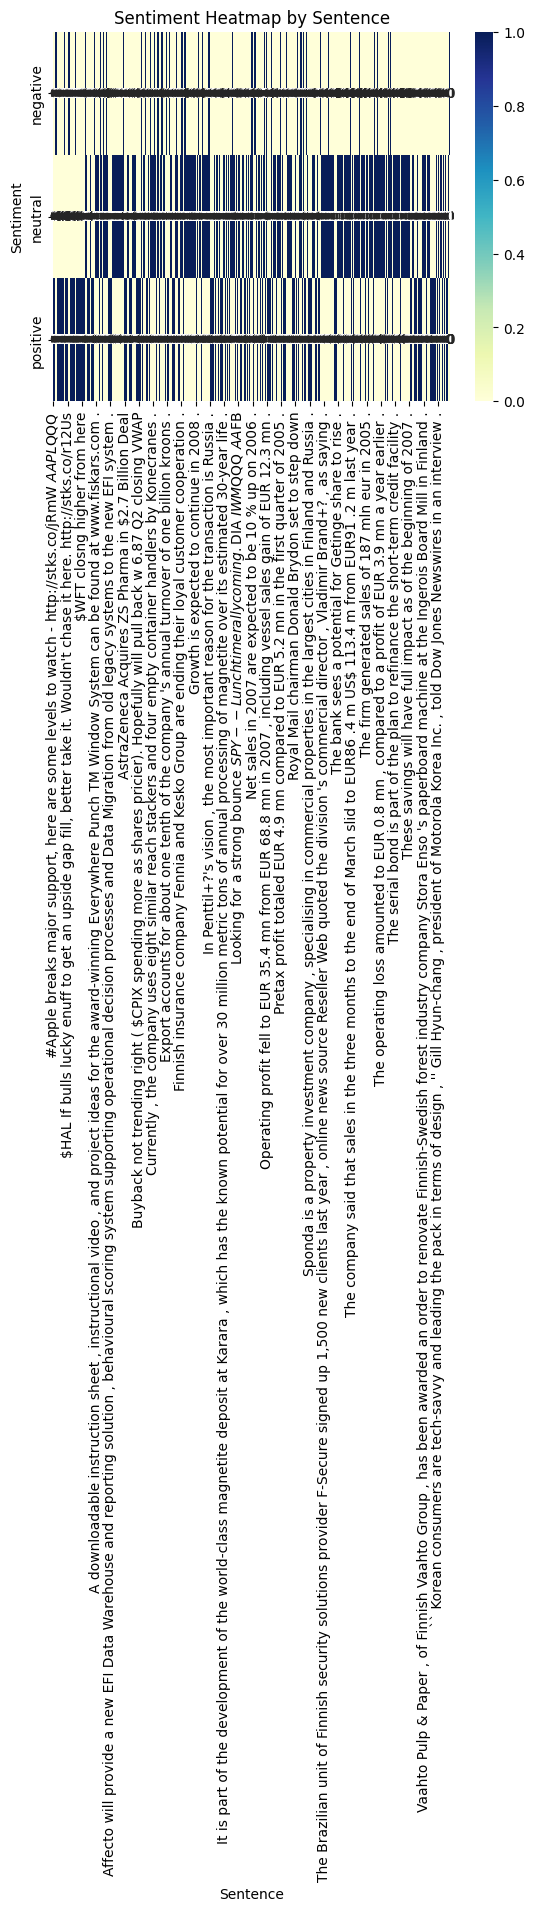

In [ ]:
heatmap =  pd.crosstab(data["Sentiment"],data["Sentence"])
sns.heatmap(heatmap , annot = True , cmap = "YlGnBu")
plt.title("Sentiment Heatmap by Sentence")
plt.show()

In [ ]:
from textblob import TextBlob
data["Sentence"][:10].apply(lambda x: str(TextBlob(x).correct()))

,Sentence
0,The GeoSolutions technology will beverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 of a real po..."
2,"For the last quarter of 2010 , Component 's ne..."
3,According to the Finnish-Russian Chamber of Co...
4,The Swedish dugout firm has sold its remaining...
5,$SPY wouldn't be surprised to see a green close
6,Shell's $70 Million of Real Meets Shareholder ...
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...
8,One 's net sales rose by some 14 % year-on-yea...
9,The Stockman department store will have a tota...


In [ ]:
import re
import string

def clean_sentence(sentence):
    '''Make text lowercase, remove text in square brackets, remove punctuation, and remove words containing numbers.'''
    sentence = sentence.lower()
    sentence = re.sub('\[.*?\]', '', sentence)
    sentence = re.sub('[%s]' % re.escape(string.punctuation), '', sentence)
    sentence = re.sub('\w*\d\w*', '', sentence)
    sentence = re.sub("[0-9" "]+", " ", sentence)
    sentence = re.sub('[‘’“”…]', '', sentence)
    sentence = re .sub('@\w+', '', sentence)
    return sentence

clean = lambda x: clean_sentence(x)

In [ ]:
data["clean_Sentence"] = data["Sentence"].apply(clean)  # Clean The Text
data.head(10)

,Sentence,Sentiment,Sentence_Length,clean_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,32,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,39,for the last quarter of componenta s net sal...
3,According to the Finnish-Russian Chamber of Co...,neutral,20,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,23,the swedish buyout firm has sold its remaining...
5,$SPY wouldn't be surprised to see a green close,positive,9,spy wouldnt be surprised to see a green close
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,8,shells billion bg deal meets shareholder skep...
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,34,ssh communications security corp stock exchang...
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,18,kone s net sales rose by some yearonyear in ...
9,The Stockmann department store will have a tot...,neutral,33,the stockmann department store will have a tot...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Apply tokenization to the "Sentence" column
data["Tokenized_Sentence"] = data["Sentence"].apply(lambda x: word_tokenize(x.lower()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Stemming
import nltk
from nltk.stem import PorterStemmer

nltk.download('punkt')

# Initialize Porter stemmer
stemmer = PorterStemmer()

# Apply stemming to the "Tokenized_Sentence" column
data["Stemmed_Sentence"] = data["Tokenized_Sentence"].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Lemmatization
import nltk
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the "Stemmed_Sentence" column
data["Lemmatized_Sentence"] = data["Stemmed_Sentence"].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Word Frequency
freq = pd.Series (" ".join(data["clean_Sentence"]).split()).value_counts()[:40]  # For top 40
freq

,count
the,6092
of,3325
in,3133
to,2785
and,2526
a,1866
for,1306
eur,1284
s,981
from,954


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words("english")
data["clean_Sentence"] = data["clean_Sentence"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
freq_sw = pd.Series(" ".join(data["clean_Sentence"]).split()).value_counts()[:20] # For top 20 words
freq_sw

,count
eur,1284
company,807
mn,729
profit,568
sales,560
finnish,527
said,516
net,499
million,493
operating,371


In [ ]:
data.head(10)

,Sentence,Sentiment,Sentence_Length,clean_Sentence,Tokenized_Sentence,Stemmed_Sentence,Lemmatized_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,32,geosolutions technology leverage benefon gps s...,"[the, geosolutions, technology, will, leverage...","[the, geosolut, technolog, will, leverag, bene...","[the, geosolut, technolog, will, leverag, bene..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11,esi lows bk real possibility,"[$, esi, on, lows, ,, down, $, 1.50, to, $, 2....","[$, esi, on, low, ,, down, $, 1.50, to, $, 2.5...","[$, esi, on, low, ,, down, $, 1.50, to, $, 2.5..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,39,last quarter componenta net sales doubled peri...,"[for, the, last, quarter, of, 2010, ,, compone...","[for, the, last, quarter, of, 2010, ,, compone...","[for, the, last, quarter, of, 2010, ,, compone..."
3,According to the Finnish-Russian Chamber of Co...,neutral,20,according finnishrussian chamber commerce majo...,"[according, to, the, finnish-russian, chamber,...","[accord, to, the, finnish-russian, chamber, of...","[accord, to, the, finnish-russian, chamber, of..."
4,The Swedish buyout firm has sold its remaining...,neutral,23,swedish buyout firm sold remaining percent sta...,"[the, swedish, buyout, firm, has, sold, its, r...","[the, swedish, buyout, firm, ha, sold, it, rem...","[the, swedish, buyout, firm, ha, sold, it, rem..."
5,$SPY wouldn't be surprised to see a green close,positive,9,spy wouldnt surprised see green close,"[$, spy, would, n't, be, surprised, to, see, a...","[$, spi, would, n't, be, surpris, to, see, a, ...","[$, spi, would, n't, be, surpris, to, see, a, ..."
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,8,shells billion bg deal meets shareholder skept...,"[shell, 's, $, 70, billion, bg, deal, meets, s...","[shell, 's, $, 70, billion, bg, deal, meet, sh...","[shell, 's, $, 70, billion, bg, deal, meet, sh..."
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,34,ssh communications security corp stock exchang...,"[ssh, communications, security, corp, stock, e...","[ssh, commun, secur, corp, stock, exchang, rel...","[ssh, commun, secur, corp, stock, exchang, rel..."
8,Kone 's net sales rose by some 14 % year-on-ye...,positive,18,kone net sales rose yearonyear first nine months,"[kone, 's, net, sales, rose, by, some, 14, %, ...","[kone, 's, net, sale, rose, by, some, 14, %, y...","[kone, 's, net, sale, rose, by, some, 14, %, y..."
9,The Stockmann department store will have a tot...,neutral,33,stockmann department store total floor space s...,"[the, stockmann, department, store, will, have...","[the, stockmann, depart, store, will, have, a,...","[the, stockmann, depart, store, will, have, a,..."


In [ ]:
dataframe = pd.DataFrame({"Uncleaned_Sentence": data.Sentence,"Clean_Sentance": data.clean_Sentence ,"Sentiment": data.Sentiment})
dataframe.head(10)

,Uncleaned_Sentence,Clean_Sentance,Sentiment
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi lows bk real possibility,negative
2,"For the last quarter of 2010 , Componenta 's n...",last quarter componenta net sales doubled peri...,positive
3,According to the Finnish-Russian Chamber of Co...,according finnishrussian chamber commerce majo...,neutral
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sold remaining percent sta...,neutral
5,$SPY wouldn't be surprised to see a green close,spy wouldnt surprised see green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,shells billion bg deal meets shareholder skept...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,ssh communications security corp stock exchang...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,kone net sales rose yearonyear first nine months,positive
9,The Stockmann department store will have a tot...,stockmann department store total floor space s...,neutral


In [ ]:
columns_to_drop = ["Sentence", "Sentence_Length", "Tokenized_Sentence", "Stemmed_Sentence", "Lemmatized_Sentence"]
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data.rename(columns={"clean_Sentence": "Sentence"}, inplace=True)

In [ ]:
data.head(5)

,Sentiment,Sentence
0,positive,geosolutions technology leverage benefon gps s...
1,negative,esi lows bk real possibility
2,positive,last quarter componenta net sales doubled peri...
3,neutral,according finnishrussian chamber commerce majo...
4,neutral,swedish buyout firm sold remaining percent sta...


In [ ]:
!pip install plotly pandas wordcloud

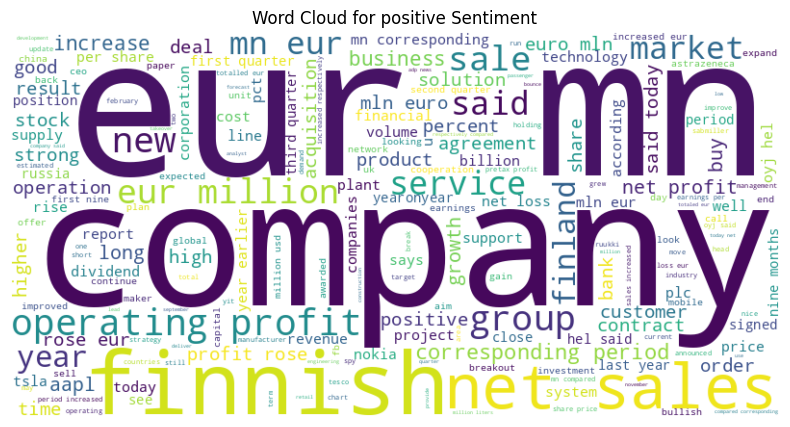

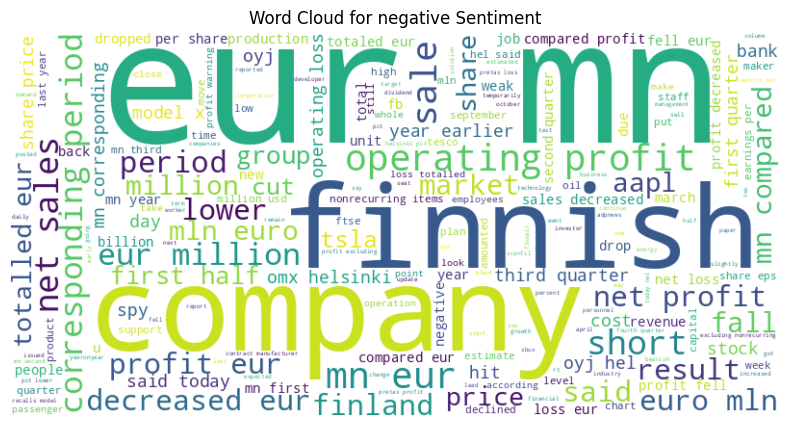

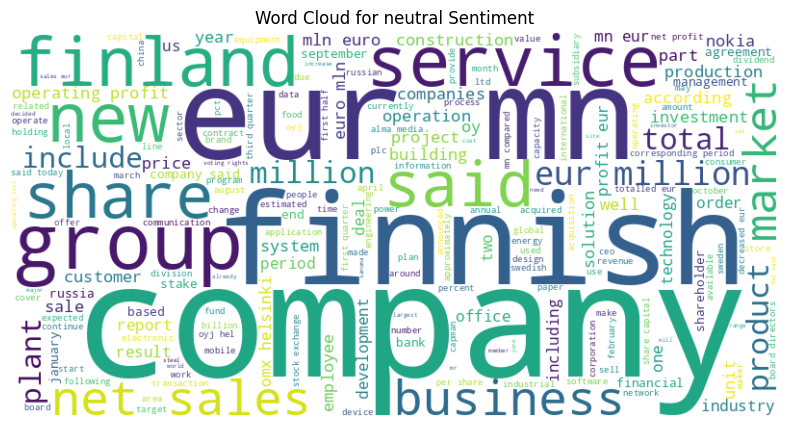

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
for sentiment in data['Sentiment'].unique():
    text = ' '.join(data[data['Sentiment'] == sentiment]['Sentence'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

In [ ]:
import plotly.graph_objects as go
from wordcloud import WordCloud

# Sample data
sentiments = data['Sentiment'].unique()

# Create separate figures for each sentiment
figures = []

for sentiment in sentiments:
    text = ' '.join(data[data['Sentiment'] == sentiment]['Sentence'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Convert word cloud to DataFrame
    wc_data = pd.DataFrame(list(wordcloud.words_.items()), columns=['word', 'count'])

    # Create a scatter plot with customized marker sizes and colors
    figure = go.Figure()
    figure.add_trace(go.Scatter3d(x=wc_data['word'],
                                 y=[sentiment] * len(wc_data),
                                 z=wc_data['count'],
                                 mode='markers',
                                 marker=dict(size=wc_data['count'] * 10,  # Adjust the scaling factor
                                             color=wc_data['count'],  # Use count as the color
                                             colorscale='Viridis',  # Choose a colorscale
                                             opacity=0.8,
                                             colorbar=dict(title='Count')),
                                 text=wc_data['count'].astype(str) + ' occurrences',
                                 name=sentiment))

    # Set axis labels and title
    figure.update_layout(scene=dict(xaxis_title='Word',
                                    yaxis_title='Sentiment',
                                    zaxis_title='Count'),
                         title_text=f'Scatter Word Cloud for {sentiment} Sentiment')

    figures.append(figure)

# Show the figures
for figure in figures:
    figure.show()

In [ ]:
# count vectorizer tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df =1 ,max_df = 5)
X = vectorizer.fit_transform(data["Sentence"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [ ]:
word_freq_df.head(20)

,term,occurrences,frequency
0,aa,1,0.000068
1,aal,1,0.000068
2,aaland,2,0.000137
3,aalto,1,0.000068
4,aaltonen,1,0.000068
5,aaron,1,0.000068
6,aava,1,0.000068
7,aazhang,1,0.000068
8,abandons,1,0.000068
9,abb,4,0.000274


In [ ]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["Sentence"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [ ]:
df

,aapl,ab,able,abp,access,accordance,according,acquire,acquired,acquisition,...,works,world,worldwide,worth,year,yearonyear,years,yesterday,yhoo,yit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.225937,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.377065,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5832,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5833,0.0,0.0,0.0,0.0,0.0,0.0,0.260145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
5834,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
top2_words = get_top_n2_words(data["Sentence"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,eur mn,701
1,net sales,276
2,eur million,240
3,operating profit,238
4,mn eur,185
5,corresponding period,148
6,euro mln,135
7,mln euro,130
8,net profit,127
9,said today,96


[Text(0, 0, 'eur mn'),
 Text(1, 0, 'net sales'),
 Text(2, 0, 'eur million'),
 Text(3, 0, 'operating profit'),
 Text(4, 0, 'mn eur'),
 Text(5, 0, 'corresponding period'),
 Text(6, 0, 'euro mln'),
 Text(7, 0, 'mln euro'),
 Text(8, 0, 'net profit'),
 Text(9, 0, 'said today'),
 Text(10, 0, 'profit eur'),
 Text(11, 0, 'oyj hel'),
 Text(12, 0, 'per share'),
 Text(13, 0, 'first quarter'),
 Text(14, 0, 'third quarter'),
 Text(15, 0, 'mn corresponding'),
 Text(16, 0, 'year earlier'),
 Text(17, 0, 'omx helsinki'),
 Text(18, 0, 'totalled eur'),
 Text(19, 0, 'mn compared')]

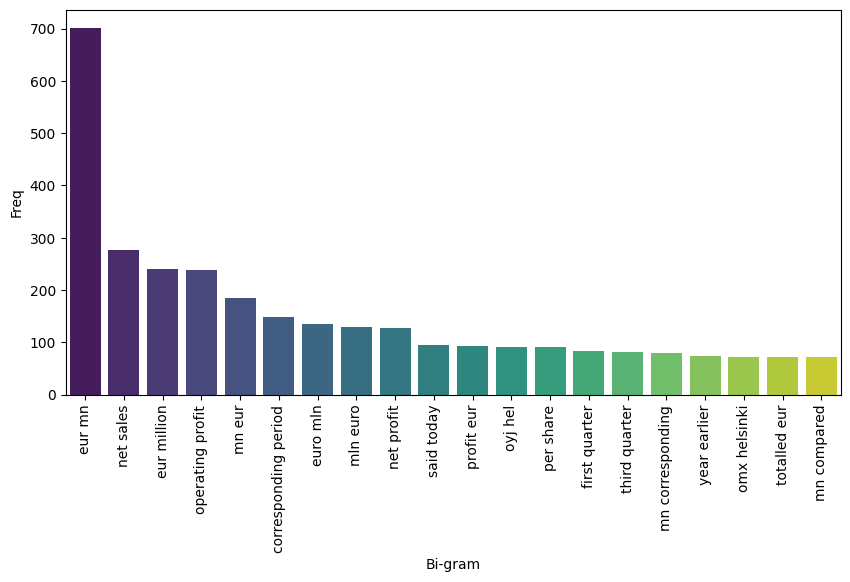

In [ ]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"], palette="viridis")
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])

In [ ]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(data["Sentence"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,eur mn eur,183
1,mn eur mn,181
2,mln euro mln,126
3,eur mn corresponding,79
4,mn corresponding period,79
...,...,...
195,oyj omx helsinki,7
196,net sales whole,7
197,profit rose mln,7
198,nine months mln,7


[Text(0, 0, 'eur mn eur'),
 Text(1, 0, 'mn eur mn'),
 Text(2, 0, 'mln euro mln'),
 Text(3, 0, 'eur mn corresponding'),
 Text(4, 0, 'mn corresponding period'),
 Text(5, 0, 'eur mn compared'),
 Text(6, 0, 'totalled eur mn'),
 Text(7, 0, 'profit eur mn'),
 Text(8, 0, 'eur million usd'),
 Text(9, 0, 'oyj hel said'),
 Text(10, 0, 'hel said today'),
 Text(11, 0, 'earnings per share'),
 Text(12, 0, 'eur mn first'),
 Text(13, 0, 'totaled eur mn'),
 Text(14, 0, 'decreased eur mn'),
 Text(15, 0, 'per share eps'),
 Text(16, 0, 'net sales eur'),
 Text(17, 0, 'eur mn year'),
 Text(18, 0, 'said today net'),
 Text(19, 0, 'first nine months')]

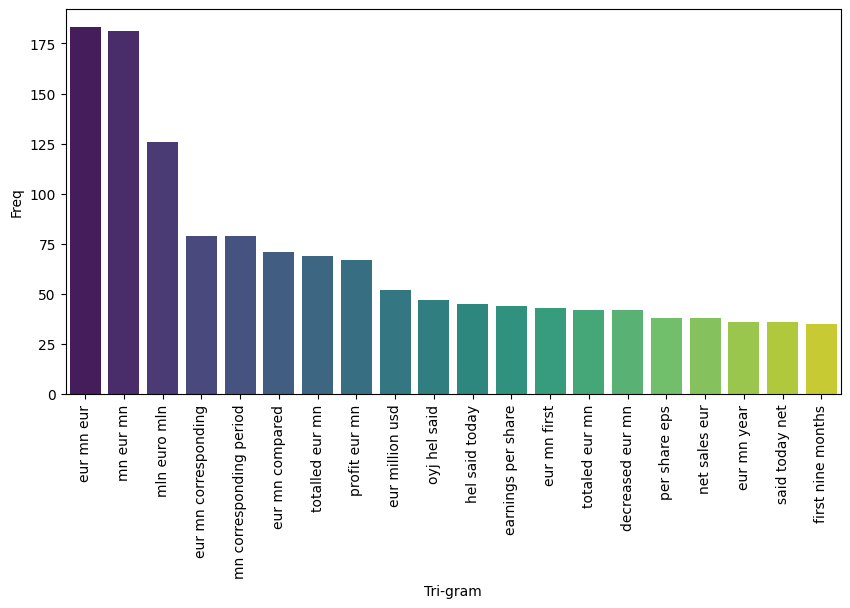

In [ ]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"], palette="viridis")
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])

In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

  Sentiment                                           Sentence
0  positive  geosolutions technology leverage benefon gps s...
1  negative                       esi lows bk real possibility
2  positive  last quarter componenta net sales doubled peri...
3   neutral  according finnishrussian chamber commerce majo...
4   neutral  swedish buyout firm sold remaining percent sta...


In [ ]:
# Assuming 'df' is your DataFrame with a column named 'Sentence'
sentences = [sentence.strip() for sentence in df['Sentence']]
sentences = [sentence for sentence in sentences if sentence]

# Joining the list into one string/text
sentences_text = ' '.join(sentences)
print(sentences_text[:2000])

geosolutions technology leverage benefon gps solutions providing location based search technology communities platform location relevant multimedia content new powerful commercial model esi lows bk real possibility last quarter componenta net sales doubled period year earlier moved zero pretax profit pretax loss according finnishrussian chamber commerce major construction companies finland operating russia swedish buyout firm sold remaining percent stake almost eighteen months taking company public finland spy wouldnt surprised see green close shells billion bg deal meets shareholder skepticism ssh communications security corp stock exchange release october pm company updates full year outlook estimates results remain loss full year kone net sales rose yearonyear first nine months stockmann department store total floor space square metres stockmann investment project price tag eur million circulation revenue increased finland sweden sap disappoints software licenses real problem cloud 

In [ ]:
# POS (Parts Of Speech) Tagging
import spacy
nlp = spacy.load('en_core_web_sm')

one_block = sentences_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[:50]:
    print(token,token.pos_)

geosolutions NOUN
technology NOUN
leverage NOUN
benefon NOUN
gps VERB
solutions NOUN
providing VERB
location NOUN
based VERB
search NOUN
technology NOUN
communities NOUN
platform NOUN
location NOUN
relevant ADJ
multimedia NOUN
content NOUN
new ADJ
powerful ADJ
commercial ADJ
model NOUN
esi PROPN
lows NOUN
bk VERB
real ADJ
possibility NOUN
last ADJ
quarter NOUN
componenta PROPN
net ADJ
sales NOUN
doubled VERB
period NOUN
year NOUN
earlier ADV
moved VERB
zero NUM
pretax ADJ
profit NOUN
pretax NOUN
loss NOUN
according VERB
finnishrussian PROPN
chamber PROPN
commerce PROPN
major ADJ
construction NOUN
companies NOUN
finland VERB
operating VERB


In [ ]:
# Filtering the nouns and verbs only
nlp.max_length =  1222000
one_block=sentences_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['rights', 'company', 'stock', 'option', 'gone', 'day', 'revenue', 'grew', 'doubledigit', 'server', 'premium', 'revenue', 'growing', 'according', 'lnen', 'aims', 'deliver', 'fish', 'products', 'customers', 'day', 'company', 'share', 'quoted', 'rtrks', 'listed', 'contracts', 'anode', 'vibrocompactors', 'delivered', 'costumer', 'aviva', 'friends', 'life', 'forecasts', 'pound', 'merger', 'stead', 'based', 'drink', 'teho', 'energy', 'drink', 'made', 'water', 'company', 'plans', 'increase', 'unit', 'specialist', 'staff', 'dozen', 'depending', 'market', 'situation', 'company', 'closed', 'year', 'turnover', 'euros', 'shire', 'ceo', 'steps', 'drive', 'get', 'baxalta', 'board', 'talking', 'premier', 'dividend', 'play', 'cost', 'fivestorey', 'ecoefficient', 'building', 'floor', 'area', 'include', 'apartments', 'installment', 'cinema', 'concludes', 'inventor', 'olavi', 'linden', 'journey', 'work', 'fiskars', 'led', 'dozens', 'design', 'awards', 'welcome', 'lindex', 'entered', 'agreement', 'wholly

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,company,747
1,sales,553
2,profit,551
3,said,516
4,eur,374
5,operating,371
6,year,318
7,quarter,305
8,period,285
9,share,270


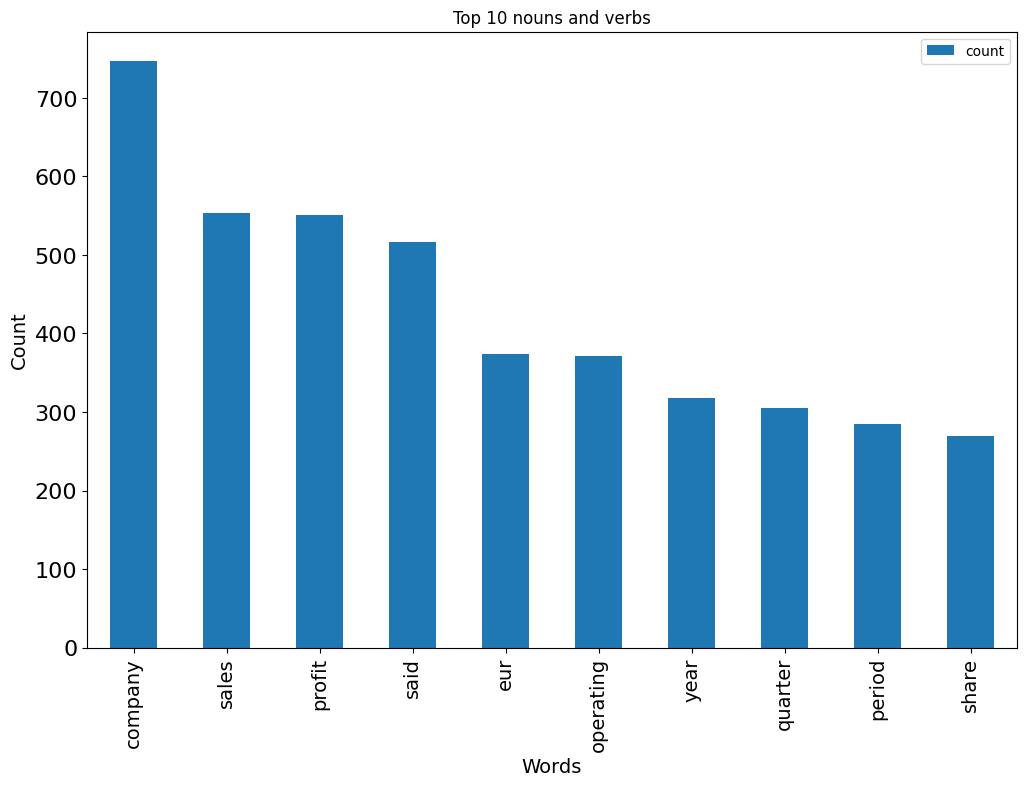

In [ ]:
# Visualization (top 10 noun and verb)
# Barchart
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(data):
    sentiment = TextBlob(data["Sentence"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)
data.head(10)

,Sentiment,Sentence,subjectivity,polarity
0,positive,geosolutions technology leverage benefon gps s...,0.588636,0.209091
1,negative,esi lows bk real possibility,0.300000,0.200000
2,positive,last quarter componenta net sales doubled peri...,0.188889,0.000000
3,neutral,according finnishrussian chamber commerce majo...,0.500000,0.062500
4,neutral,swedish buyout firm sold remaining percent sta...,0.233333,-0.100000
5,positive,spy wouldnt surprised see green close,0.600000,-0.050000
6,negative,shells billion bg deal meets shareholder skept...,0.000000,0.000000
7,negative,ssh communications security corp stock exchang...,0.550000,0.350000
8,positive,kone net sales rose yearonyear first nine months,0.427778,0.283333
9,neutral,stockmann department store total floor space s...,0.750000,0.000000


In [ ]:
# 1 way
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def fetch_sentiment_using_SIA(Sentence):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(Sentence)

    if polarity_scores['compound'] >= 0.05:
        return 'pos'
    elif polarity_scores['compound'] <= -0.05:
        return 'neg'
    else:
        return 'neutral'

# 2 way
def fetch_sentiment_using_textblob(Sentence):
    analysis = TextBlob(Sentence)

    if analysis.sentiment.polarity > 0:
        return 'pos'
    elif analysis.sentiment.polarity < 0:
        return 'neg'
    else:
        return 'neutral'

In [ ]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Create a New Analysis Column
data["analysis"] = data["polarity"].apply(analysis)

In [ ]:
positive_sentence = data[data['analysis'] == 'Positive']
negative_sentence = data[data['analysis'] == 'Negative']
nutral_sentence = data[data['analysis'] == 'Negative']

print('positive sentences')
for i, row in positive_sentence[:5].iterrows():
    print(' -' + row['Sentence'])

print('negative sentences')
for i, row in negative_sentence[:5].iterrows():
    print(' -' + row['Sentence'])

print('nutral sentences')
for i, row in nutral_sentence[:5].iterrows():
    print(' -' + row['Sentence'])

positive sentences
 -geosolutions technology leverage benefon gps solutions providing location based search technology communities platform location relevant multimedia content new powerful commercial model
 -esi lows bk real possibility
 -according finnishrussian chamber commerce major construction companies finland operating russia
 -ssh communications security corp stock exchange release october pm company updates full year outlook estimates results remain loss full year
 -kone net sales rose yearonyear first nine months
negative sentences
 -swedish buyout firm sold remaining percent stake almost eighteen months taking company public finland
 -spy wouldnt surprised see green close
 -fb gone green day
 -company closed last year turnover four million euros
 -aapl afternoon selloff usual brutal get ready lose ton money
nutral sentences
 -swedish buyout firm sold remaining percent stake almost eighteen months taking company public finland
 -spy wouldnt surprised see green close
 -fb gon

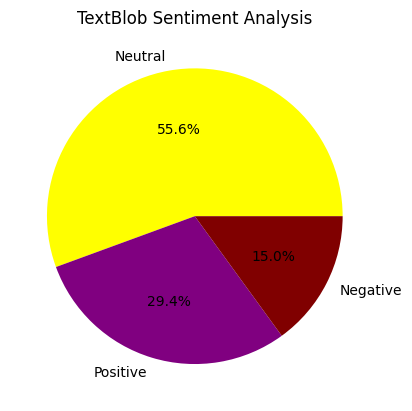

In [ ]:
sentiment_counts = data['analysis'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['yellow', 'purple', 'maroon'])
plt.title("TextBlob Sentiment Analysis")
plt.show()

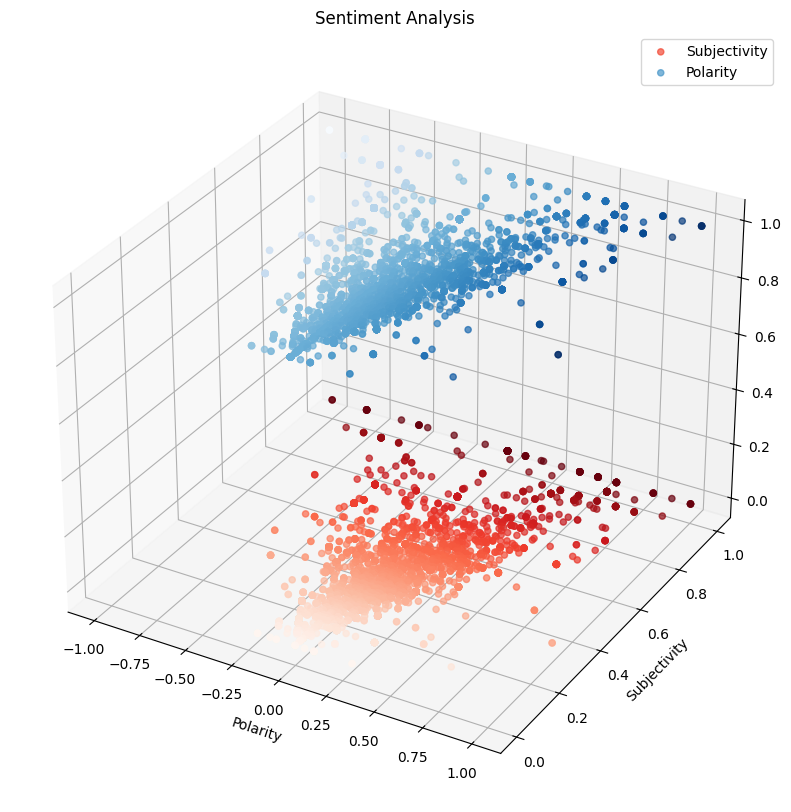

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Subjectivity
ax.scatter(data["polarity"], data["subjectivity"], zs=0, c=data["subjectivity"], cmap='Reds', label='Subjectivity', alpha=0.7)

# Scatter plot for Polarity
ax.scatter(data["polarity"], data["subjectivity"], zs=1, c=data["polarity"], cmap='Blues', label='Polarity', alpha=0.7)

ax.set_title("Sentiment Analysis")
ax.set_xlabel("Polarity")
ax.set_ylabel("Subjectivity")

plt.legend()
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data['VADER_Sentiment'] = data['Sentence'].apply(lambda x: 'Positive' if sid.polarity_scores(x)['compound'] >= 0.05 else ('Negative' if sid.polarity_scores(x)['compound'] <= -0.05 else 'Neutral'))

# Compare VADER sentiment with the actual "Sentiment" column
data['Sentiment'] == data['VADER_Sentiment']

data.head(10)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Sentiment,Sentence,subjectivity,polarity,analysis,VADER_Sentiment
0,positive,geosolutions technology leverage benefon gps s...,0.588636,0.209091,Positive,Positive
1,negative,esi lows bk real possibility,0.300000,0.200000,Positive,Negative
2,positive,last quarter componenta net sales doubled peri...,0.188889,0.000000,Neutral,Positive
3,neutral,according finnishrussian chamber commerce majo...,0.500000,0.062500,Positive,Neutral
4,neutral,swedish buyout firm sold remaining percent sta...,0.233333,-0.100000,Negative,Neutral
5,positive,spy wouldnt surprised see green close,0.600000,-0.050000,Negative,Negative
6,negative,shells billion bg deal meets shareholder skept...,0.000000,0.000000,Neutral,Negative
7,negative,ssh communications security corp stock exchang...,0.550000,0.350000,Positive,Neutral
8,positive,kone net sales rose yearonyear first nine months,0.427778,0.283333,Positive,Neutral
9,neutral,stockmann department store total floor space s...,0.750000,0.000000,Neutral,Neutral


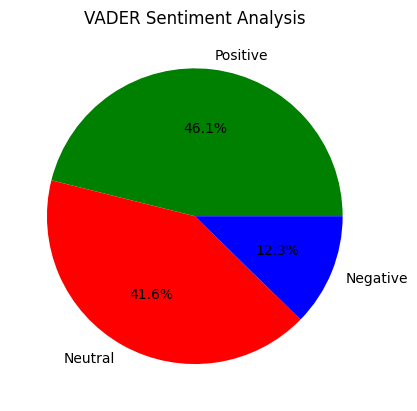

In [ ]:
sentiment_counts = data['VADER_Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title("VADER Sentiment Analysis")
plt.show()

In [ ]:
data.head(10)

,Sentiment,Sentence,subjectivity,polarity,analysis,VADER_Sentiment
0,positive,geosolutions technology leverage benefon gps s...,0.588636,0.209091,Positive,Positive
1,negative,esi lows bk real possibility,0.300000,0.200000,Positive,Negative
2,positive,last quarter componenta net sales doubled peri...,0.188889,0.000000,Neutral,Positive
3,neutral,according finnishrussian chamber commerce majo...,0.500000,0.062500,Positive,Neutral
4,neutral,swedish buyout firm sold remaining percent sta...,0.233333,-0.100000,Negative,Neutral
5,positive,spy wouldnt surprised see green close,0.600000,-0.050000,Negative,Negative
6,negative,shells billion bg deal meets shareholder skept...,0.000000,0.000000,Neutral,Negative
7,negative,ssh communications security corp stock exchang...,0.550000,0.350000,Positive,Neutral
8,positive,kone net sales rose yearonyear first nine months,0.427778,0.283333,Positive,Neutral
9,neutral,stockmann department store total floor space s...,0.750000,0.000000,Neutral,Neutral


In [ ]:
Data= data.iloc[:,[1,-1]]
Data

,Sentence,VADER_Sentiment
0,geosolutions technology leverage benefon gps s...,Positive
1,esi lows bk real possibility,Negative
2,last quarter componenta net sales doubled peri...,Positive
3,according finnishrussian chamber commerce majo...,Neutral
4,swedish buyout firm sold remaining percent sta...,Neutral
...,...,...
5837,rising costs forced packaging producer huhtama...,Negative
5838,nordic walking first used summer training meth...,Neutral
5839,according shipping company viking line eu deci...,Positive
5840,building home improvement trade sales decrease...,Positive


In [ ]:
Data["VADER_Sentiment"] = Data["VADER_Sentiment"].map({"Negative": -1 , "Neutral": 0 , "Positive": 1})
Data.head()

,Sentence,VADER_Sentiment
0,geosolutions technology leverage benefon gps s...,1
1,esi lows bk real possibility,-1
2,last quarter componenta net sales doubled peri...,1
3,according finnishrussian chamber commerce majo...,0
4,swedish buyout firm sold remaining percent sta...,0


In [ ]:
data.head(3)

,Sentiment,Sentence,subjectivity,polarity,analysis,VADER_Sentiment
0,positive,geosolutions technology leverage benefon gps s...,0.588636,0.209091,Positive,Positive
1,negative,esi lows bk real possibility,0.300000,0.200000,Positive,Negative
2,positive,last quarter componenta net sales doubled peri...,0.188889,0.000000,Neutral,Positive


In [ ]:
# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data['Sentence'], Data['VADER_Sentiment'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((4668,), (1168,), (4668,), (1168,))

In [ ]:
# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000 , random_state = 42)
model.fit(X_train_vectorized , y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
train_predictions = model.predict(X_train_vectorized)
train_predictions

array([ 1,  1,  0, ...,  0,  1, -1])

In [ ]:
# test Prediction
test_predictions = model.predict(X_test_vectorized)
test_predictions

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Accuracy On Train Data is :", train_accuracy)
print("Accuracy On Test Data is :", test_accuracy)

Accuracy On Train Data is : 0.9972150814053128
Accuracy On Test Data is : 0.8450342465753424


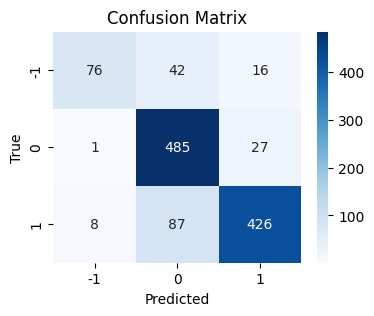

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

          -1       0.89      0.57      0.69       134
           0       0.79      0.95      0.86       513
           1       0.91      0.82      0.86       521

    accuracy                           0.85      1168
   macro avg       0.86      0.78      0.81      1168
weighted avg       0.85      0.85      0.84      1168



In [ ]:
results_df = pd.DataFrame({'Original Sentiment': y_test, 'Predicted Sentiment': test_predictions, 'Sentence': X_test})
results_df.head(10)

,Original Sentiment,Predicted Sentiment,Sentence
3313,0,0,ebit margin
5453,0,0,according vauramo plant lifting equipment suit...
2686,0,0,food trade sales amounted decline
1554,0,0,commission income fell eur mn eur mn correspon...
4192,1,1,alma media operating profit amounted eur mn eu...
4918,-1,-1,strike finnair estimates incur net loss per day
1504,0,0,russia video international group holds control...
3010,0,0,baltic pearl cjsc subsidiary shanghai foreign ...
4319,0,0,added cost bounce put oi pivot moteltan bto aa...
5689,1,1,company said paper demand increased main marke...


In [ ]:
# Train the Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
# Train Test Prediction
nb_train_predictions = nb_model.predict(X_train_vectorized)
nb_test_predictions = nb_model.predict(X_test_vectorized)

In [ ]:
nb_test_predictions

array([-1,  0,  1, ...,  0,  1,  1])

In [ ]:
# Evaluate the model
accuracy_train_nb = accuracy_score(y_train, nb_train_predictions)
accuracy_test_nb = accuracy_score(y_test, nb_test_predictions)

print("Accuracy On Train Data is :", accuracy_train_nb)
print("Accuracy On Test Data is :", accuracy_test_nb)

Accuracy On Train Data is : 0.912382176520994
Accuracy On Test Data is : 0.7422945205479452


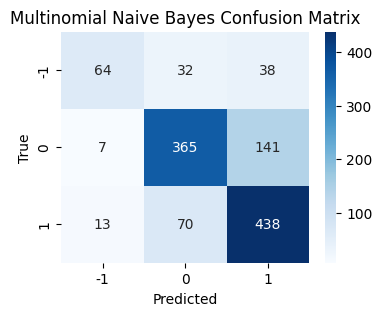

In [ ]:
# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, nb_test_predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test, nb_test_predictions)
print("\nClassification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

          -1       0.76      0.48      0.59       134
           0       0.78      0.71      0.74       513
           1       0.71      0.84      0.77       521

    accuracy                           0.74      1168
   macro avg       0.75      0.68      0.70      1168
weighted avg       0.75      0.74      0.74      1168



In [ ]:
results_df = pd.DataFrame({'Original Sentiment': y_test, 'Predicted Sentiment': nb_test_predictions, 'Sentence': X_test})
results_df.head(10)

,Original Sentiment,Predicted Sentiment,Sentence
3313,0,-1,ebit margin
5453,0,0,according vauramo plant lifting equipment suit...
2686,0,1,food trade sales amounted decline
1554,0,1,commission income fell eur mn eur mn correspon...
4192,1,1,alma media operating profit amounted eur mn eu...
4918,-1,-1,strike finnair estimates incur net loss per day
1504,0,0,russia video international group holds control...
3010,0,0,baltic pearl cjsc subsidiary shanghai foreign ...
4319,0,0,added cost bounce put oi pivot moteltan bto aa...
5689,1,1,company said paper demand increased main marke...


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import GridSearchCV

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 1000 ,max_depth= None , min_samples_split = 5 ,min_samples_leaf = 1,random_state= 42 )
rf_model.fit(X_train_vectorized, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=1000, random_state=42)

In [ ]:
# Make predictions
rf_train_predictions = rf_model.predict(X_train_vectorized)
rf_test_predictions = rf_model.predict(X_test_vectorized)

In [ ]:
# Create a DataFrame with original and predicted sentiments
results_rf = pd.DataFrame({'Original Sentiment': y_test, 'Predicted Sentiment': rf_test_predictions, 'Sentence': X_test})
results_rf.head(10)

,Original Sentiment,Predicted Sentiment,Sentence
3313,0,0,ebit margin
5453,0,0,according vauramo plant lifting equipment suit...
2686,0,0,food trade sales amounted decline
1554,0,0,commission income fell eur mn eur mn correspon...
4192,1,1,alma media operating profit amounted eur mn eu...
4918,-1,-1,strike finnair estimates incur net loss per day
1504,0,0,russia video international group holds control...
3010,0,0,baltic pearl cjsc subsidiary shanghai foreign ...
4319,0,0,added cost bounce put oi pivot moteltan bto aa...
5689,1,1,company said paper demand increased main marke...


In [ ]:
# Evaluate the model
accuracy_train_rf = accuracy_score(y_train, rf_train_predictions)
accuracy_test_rf = accuracy_score(y_test, rf_test_predictions)

print("Accuracy On Train Data is :", accuracy_train_rf)
print("Accuracy On Test Data is :", accuracy_test_rf)

Accuracy On Train Data is : 0.9989288774635818
Accuracy On Test Data is : 0.8707191780821918


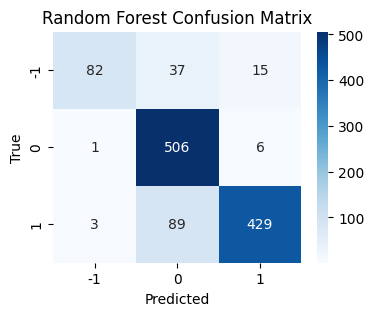

In [ ]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, rf_test_predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Classificaton Report
class_report_rf = classification_report(y_test, rf_test_predictions)
print("\nRandom Forest Classification Report:\n")
print(class_report_rf)


Random Forest Classification Report:

              precision    recall  f1-score   support

          -1       0.95      0.61      0.75       134
           0       0.80      0.99      0.88       513
           1       0.95      0.82      0.88       521

    accuracy                           0.87      1168
   macro avg       0.90      0.81      0.84      1168
weighted avg       0.89      0.87      0.87      1168



In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state =42)

# Train the SVM model
svm_classifier.fit(X_train_vectorized, y_train)

SVC(random_state=42)

In [ ]:
# Make predictions
svm_train_predictions = svm_classifier.predict(X_train_vectorized)
svm_test_predictions = svm_classifier.predict(X_test_vectorized)

In [ ]:
svm_test_predictions

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Create a DataFrame with original and predicted sentiments
results_svm = pd.DataFrame({'Original Sentiment': y_test, 'Predicted Sentiment': svm_test_predictions, 'Sentence': X_test})
results_svm.head(10)

,Original Sentiment,Predicted Sentiment,Sentence
3313,0,0,ebit margin
5453,0,0,according vauramo plant lifting equipment suit...
2686,0,0,food trade sales amounted decline
1554,0,0,commission income fell eur mn eur mn correspon...
4192,1,1,alma media operating profit amounted eur mn eu...
4918,-1,-1,strike finnair estimates incur net loss per day
1504,0,0,russia video international group holds control...
3010,0,0,baltic pearl cjsc subsidiary shanghai foreign ...
4319,0,0,added cost bounce put oi pivot moteltan bto aa...
5689,1,1,company said paper demand increased main marke...


In [ ]:
# Evaluate the model
accuracy_train_svm = accuracy_score(y_train, svm_train_predictions)
accuracy_test_svm = accuracy_score(y_test, svm_test_predictions)

print("Accuracy On Train Data is :", accuracy_train_svm)
print("Accuracy On Test Data is :", accuracy_test_svm)

Accuracy On Train Data is : 0.9631533847472151
Accuracy On Test Data is : 0.7893835616438356


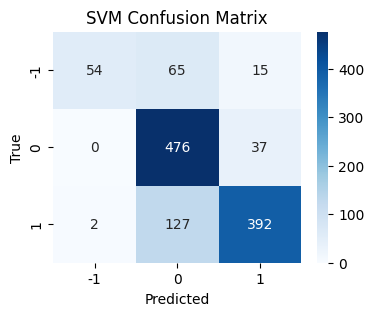

In [ ]:
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, svm_test_predictions)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Classification report
class_report_svm = classification_report(y_test, svm_test_predictions)
print("\nSVM Classification Report:\n")
print(class_report_svm)


SVM Classification Report:

              precision    recall  f1-score   support

          -1       0.96      0.40      0.57       134
           0       0.71      0.93      0.81       513
           1       0.88      0.75      0.81       521

    accuracy                           0.79      1168
   macro avg       0.85      0.69      0.73      1168
weighted avg       0.82      0.79      0.78      1168



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
# Train the AdaBoost model with the best parameters
adaboost_model = AdaBoostClassifier(random_state=42, n_estimators = 800 )
adaboost_model.fit(X_train_vectorized, y_train)

AdaBoostClassifier(n_estimators=800, random_state=42)

In [ ]:
# Make predictions
adaboost_train_predictions = adaboost_model.predict(X_train_vectorized)
adaboost_test_predictions = adaboost_model.predict(X_test_vectorized)

In [ ]:
adaboost_test_predictions

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Create a DataFrame with original and predicted sentiments
results_adaboost = pd.DataFrame({'Original Sentiment': y_test, 'Predicted Sentiment': adaboost_test_predictions, 'Sentence': X_test})
results_adaboost.head(10)

,Original Sentiment,Predicted Sentiment,Sentence
3313,0,0,ebit margin
5453,0,0,according vauramo plant lifting equipment suit...
2686,0,0,food trade sales amounted decline
1554,0,0,commission income fell eur mn eur mn correspon...
4192,1,1,alma media operating profit amounted eur mn eu...
4918,-1,-1,strike finnair estimates incur net loss per day
1504,0,0,russia video international group holds control...
3010,0,0,baltic pearl cjsc subsidiary shanghai foreign ...
4319,0,0,added cost bounce put oi pivot moteltan bto aa...
5689,1,1,company said paper demand increased main marke...


In [ ]:
# Evaluate the model
accuracy_train_adaboost = accuracy_score(y_train, adaboost_train_predictions)
accuracy_test_adaboost = accuracy_score(y_test, adaboost_test_predictions)

print("Accuracy On Train Data is :", accuracy_train_adaboost)
print("Accuracy On Test Data is :", accuracy_test_adaboost)

Accuracy On Train Data is : 0.7039417309340189
Accuracy On Test Data is : 0.696917808219178


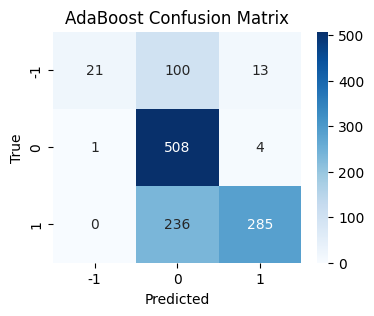

In [ ]:
# Confusion Matrix
conf_matrix_adaboost = confusion_matrix(y_test, adaboost_test_predictions)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues", xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Classification report
class_report_adaboost = classification_report(y_test, adaboost_test_predictions)
print("\nAdaBoost Classification Report:\n")
print(class_report_adaboost)


AdaBoost Classification Report:

              precision    recall  f1-score   support

          -1       0.95      0.16      0.27       134
           0       0.60      0.99      0.75       513
           1       0.94      0.55      0.69       521

    accuracy                           0.70      1168
   macro avg       0.83      0.56      0.57      1168
weighted avg       0.79      0.70      0.67      1168

